# Imports

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# Leer el dataset

In [5]:
data = pd.read_excel ("Libro2.xlsx")
data  # ac = acumulados

,temporada,partidos,goles,golesac,partidosac
0,2009/2010,44,19,19,44
1,2010/2011,50,20,39,94
2,2011/2012,12,0,39,106
3,2012/2013,38,17,56,144
4,2013-2014,33,16,72,177
5,2014-2015,46,18,90,223
6,2015-2016,37,18,108,260
7,2016-2017,37,25,133,297
8,2017-2018,43,22,155,340
9,2018-2019,41,14,169,381


# Mostrar estadísticos básicos

In [6]:
data.describe()

,partidos,goles,golesac,partidosac
count,14.000000,14.000000,14.000000,14.000000
mean,35.928571,17.142857,127.785714,283.285714
std,13.257592,9.003052,78.796894,157.630253
min,3.000000,0.000000,19.000000,44.000000
25%,34.000000,14.500000,60.000000,152.250000
50%,39.500000,18.000000,120.500000,278.500000
75%,43.750000,21.500000,193.000000,416.250000
max,50.000000,32.000000,240.000000,503.000000


# Informacion del dataset

In [7]:
data.info

<bound method DataFrame.info of     temporada  partidos  goles  golesac  partidosac
0   2009/2010        44     19       19          44
1   2010/2011        50     20       39          94
2   2011/2012        12      0       39         106
3   2012/2013        38     17       56         144
4   2013-2014        33     16       72         177
5   2014-2015        46     18       90         223
6   2015-2016        37     18      108         260
7   2016-2017        37     25      133         297
8   2017-2018        43     22      155         340
9   2018-2019        41     14      169         381
10  2019-2020        47     32      201         428
11  2020-2021        41     28      229         469
12  2021-2022        31     10      239         500
13  2022-2023         3      1      240         503>

# Mostrar dispercion de datos de los valores "partidosac" y "golesac"

<AxesSubplot:xlabel='partidosac', ylabel='golesac'>

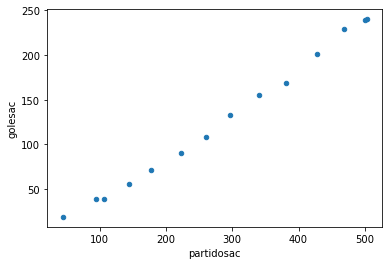

In [8]:
data.plot.scatter(x="partidosac", y="golesac")

# Regresión lineal

In [9]:
reg = LinearRegression()
reg.fit(data[["partidosac"]], data["golesac"])

LinearRegression()

# Predicción

In [10]:
 reg.predict([[200],[100]])

C:\Users\tomas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86.26470432, 36.41100454])

In [11]:
pred = pd.Series(reg.predict(data[["partidosac"]]))
pred


0       8.492933
1      33.419783
2      39.402227
3      58.346632
4      74.798353
5      97.731055
6     116.176924
7     134.622793
8     156.059884
9     176.499901
10    199.931140
11    220.371157
12    235.825804
13    237.321415
dtype: float64

In [12]:
data["prediccion"] = pred #se agrega la predicción al data
data 

,temporada,partidos,goles,golesac,partidosac,prediccion
0,2009/2010,44,19,19,44,8.492933
1,2010/2011,50,20,39,94,33.419783
2,2011/2012,12,0,39,106,39.402227
3,2012/2013,38,17,56,144,58.346632
4,2013-2014,33,16,72,177,74.798353
5,2014-2015,46,18,90,223,97.731055
6,2015-2016,37,18,108,260,116.176924
7,2016-2017,37,25,133,297,134.622793
8,2017-2018,43,22,155,340,156.059884
9,2018-2019,41,14,169,381,176.499901


# Graficar regresión lineal

<AxesSubplot:xlabel='partidosac', ylabel='golesac'>

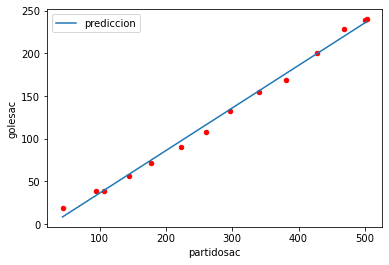

In [17]:
ax = data.plot.line(x="partidosac", y="prediccion")
data.plot.scatter(x="partidosac", y="golesac", ax= ax, color="red")

# Validación del modelo con coeficiente de determinación o r cuadrado

In [14]:
lm = smf.ols(formula="partidosac~golesac", data= data).fit()
lm.summary()

C:\Users\tomas\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             partidosac   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2217.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           5.50e-15
Time:                        16:19:05   Log-Likelihood:                -53.619
No. Observations:                  14   AIC:                             111.2
Df Residuals:                      12   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.3442      6.298      4.500      0.001      14.622      42.067
golesac        1.9951      0.042     47.086      0.000       1.903       2.087
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   0.766
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.415
Skew:                          -0.291   Prob(JB):                        0.813
Kurtosis:                       2.390   Cond. No.                         291.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# el r2 es de 0,995, lo que significa que el modelo es preciso